In [1]:
from numpy import *
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [2]:
# PDE u_t = u_xx + f
# domain 0 <= x <= L
# discretized into n equidistant intervals, step size h
L = 2
n = 20
x = linspace(0,L,n+1)
h = x[1]-x[0]
# time interval 0 <= t <= T
# discretized into time steps of length tau
T = 1
tau = 0.1
m = int(T/tau)
t = linspace(tau,T,m)
# grid ratio
gam = tau/(h**2)
print('gamma = %6.4f' % gam)

gamma = 10.0000


In [3]:
# initial condition
def u0(x):
    return zeros_like(x)

# source term
def f(t,x):
    return (1+pi*pi*t)*sin(pi*x) 

# solution: u(t,x) = t * sin(pi*x)
def u_true(t,x):
    return t*sin(pi*x)

In [4]:
# Inner points: 1+2*gamma on diagonal, -gamma on upper/lower
maindiag = 1+2*gam*ones(n+1)
leftdiag = -gam*ones(n)
rghtdiag = -gam*ones(n)
# Dirichlet conditions at first grid point
maindiag[0] = 1
rghtdiag[0] = 0
# Dirichlet conditions at last grid point
maindiag[-1] = 1
leftdiag[-1] = 0
# System matrix as sparse matrix
A = diags([maindiag, leftdiag, rghtdiag], [0, -1, 1], format='csr') 

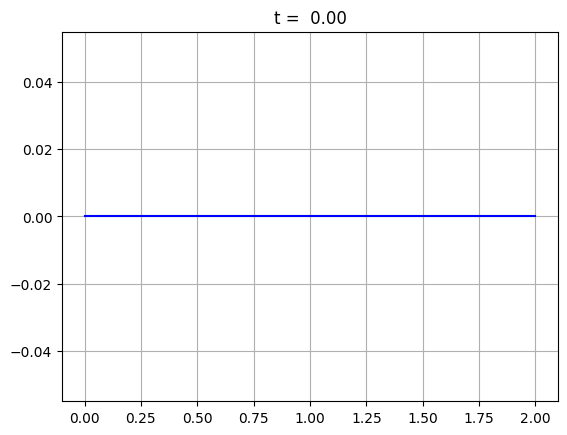

In [5]:
# Plot initial condition
u = u0(x)
unew = zeros_like(u)
plt.plot(x,u, 'b-')
plt.title('t = %5.2f' % 0)
plt.grid()
plt.show()# Initial condition
u = u0(x)

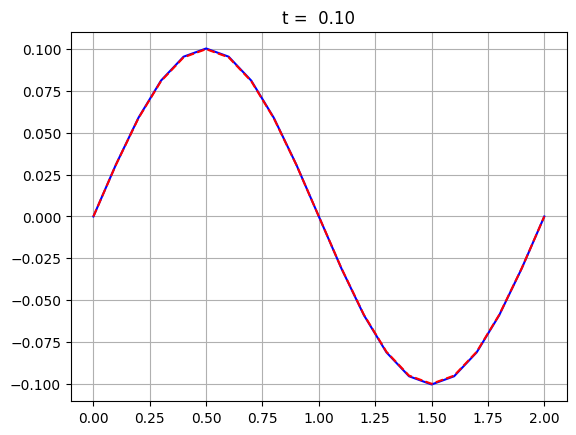

Time t= 0.10  rel.Error=0.004089


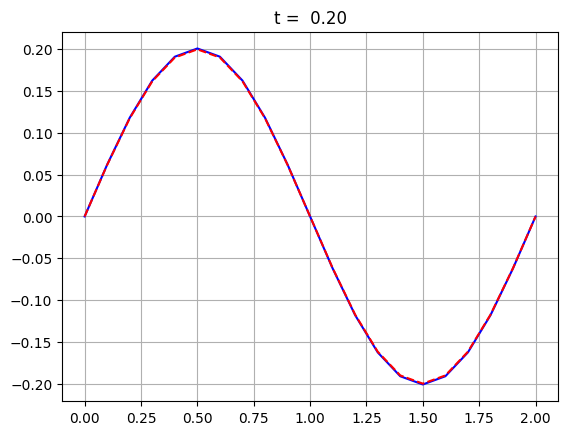

Time t= 0.20  rel.Error=0.005122


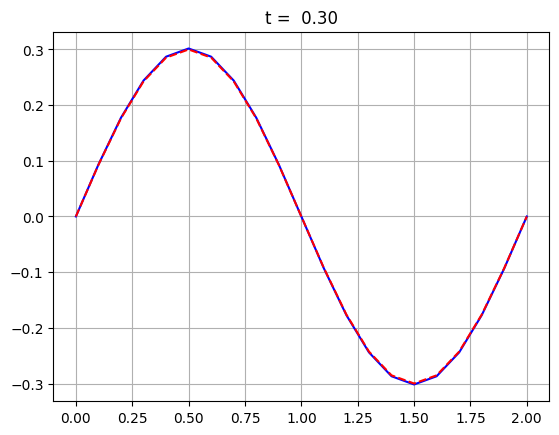

Time t= 0.30  rel.Error=0.005814


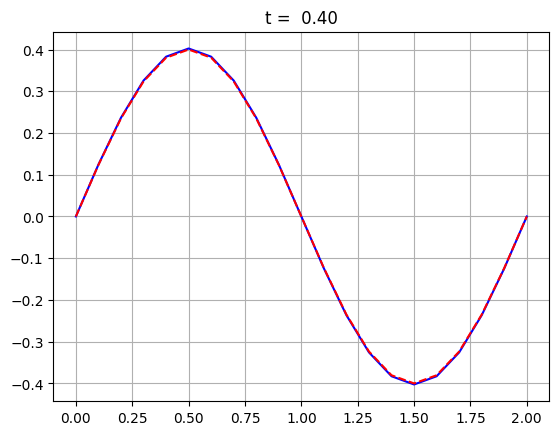

Time t= 0.40  rel.Error=0.006292


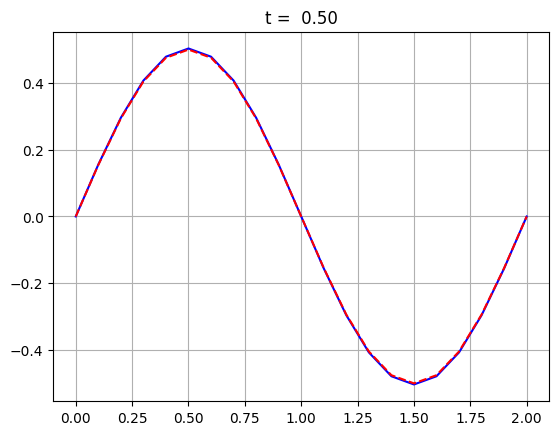

Time t= 0.50  rel.Error=0.006632


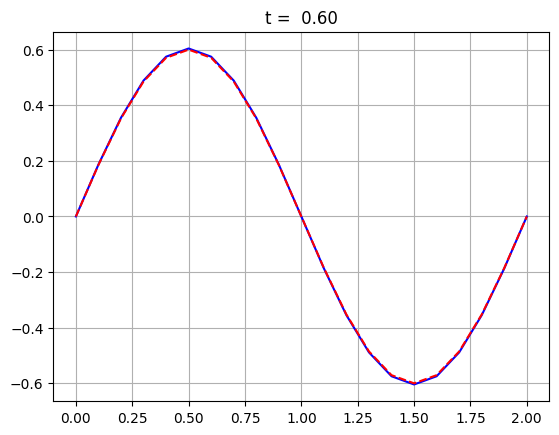

Time t= 0.60  rel.Error=0.006882


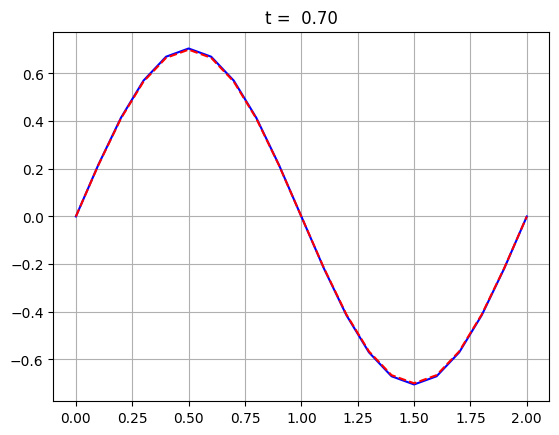

Time t= 0.70  rel.Error=0.007069


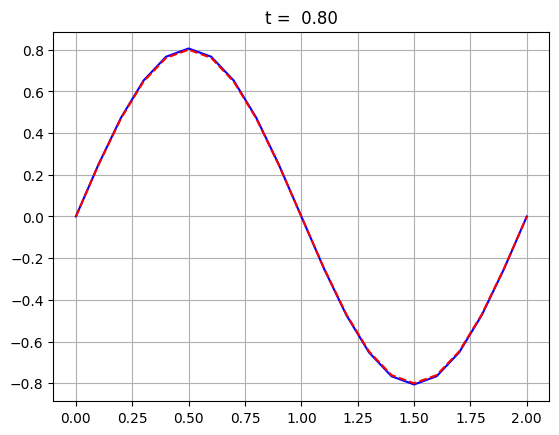

Time t= 0.80  rel.Error=0.007214


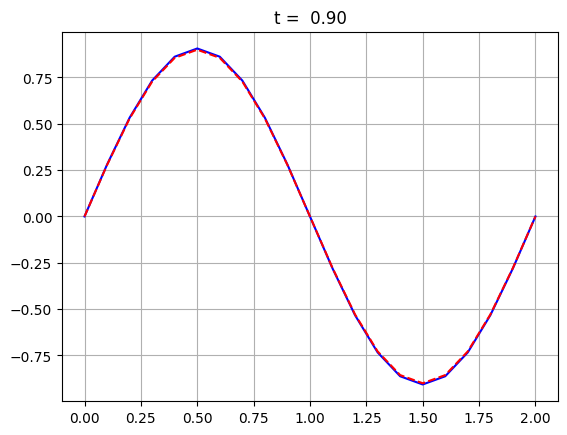

Time t= 0.90  rel.Error=0.007329


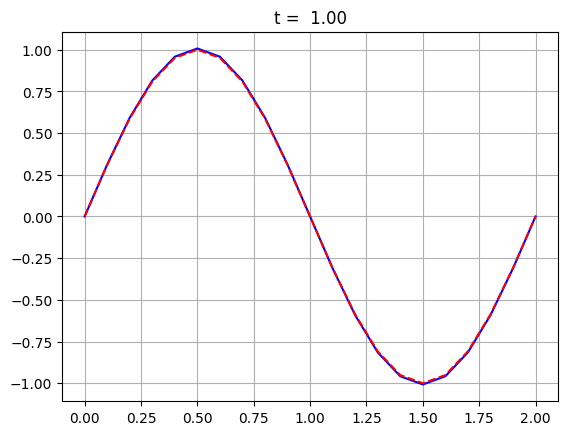

Time t= 1.00  rel.Error=0.007422


In [6]:
# Time loop
for tt in arange(tau,T+tau/2,tau):
    # Set up right hand side
    b = u + tau*f(tt,x)
    # Dirichlet conditions
    b[0] = 0.
    b[n] = 0.
    
    # Solve linear system, use solver for sparse matrices
    u = spsolve(A,b)
    # Plot new solution
    if isclose(abs(10*tt-around(10*tt)),0):
        plt.plot(x,u, 'b-', x, u_true(tt,x), 'r--')
        plt.title('t = %5.2f' % tt)
        plt.grid()
        plt.show()
        print('Time t=%5.2f  rel.Error=%8.6f' %(tt, amax(abs(u-u_true(tt,x)))/amax(abs(u_true(tt,x)))))